# Dependencies

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import seaborn as sns

from ledsa.postprocessing.simulation import SimData

# Display Config

In [12]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 10
cm = 1 / 2.54

# Load Simulation Data

In [13]:
# Input Dir (Simulations)
path_simulation = '/Path/to/simulation'
sim = SimData(path_simulation)

config.ini loaded
config_analysis.ini loaded!


# LED Intensites

## Plot normalized LED Intensities as a function of height for a specific point in time

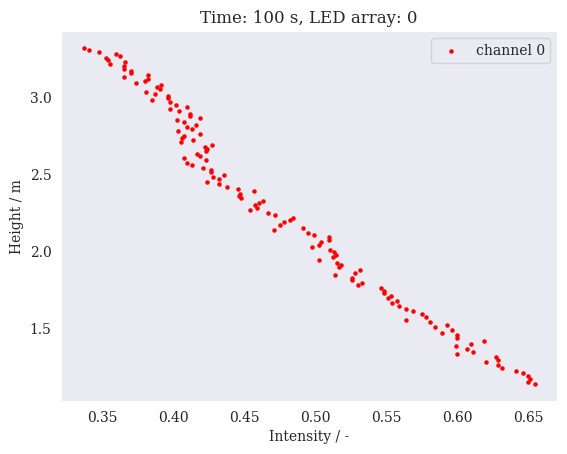

In [14]:
# Parameters for LED line analysis
color_channel = 0 # Color channel of the camera to analyze
led_array_id = 0  # ID of the LED line to analyze
window = 1  # Size of moving average window for smoothing
time = 100  # Time point to analyze in seconds

# Get normalized LED intensities at specified time and line
extco_red = sim.get_ledparams_at_led_array(channel=color_channel, led_array_id=led_array_id, window=window, yaxis='height').iloc[
            time, :]

# Create scatter plot of LED intensity vs height
fig, ax = plt.subplots()
ax.scatter(extco_red, extco_red.index, color='red', s=5, label="channel 0")
ax.grid()
ax.set_title(f"Time: {time} s, LED array: {led_array_id}")
ax.set_xlabel("Intensity / -")
ax.set_ylabel("Height / m")
ax.legend(loc='best')


## Single LED analysis

/var/folders/x3/ws8n0j052hzgsdtmvtyyq7fm0000gn/T/ipykernel_1652/2412729535.py:50: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  ip = InsetPosition(ax3, [1.05, 0, 0.05, 1])


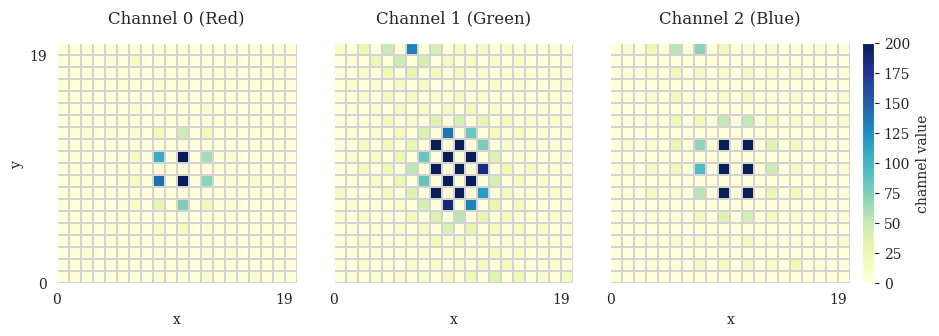

In [15]:
# Configuration parameters
led_id = 887  # LED identifier to analyze
time = 0 # Time point in seconds
radius = 10  # Radius in pixels around LED center to analyze
vmin = 0  # Minimum value for color scale
vmax = 200  # Maximum value for color scale

# Get RGB channel arrays around LED

red_channel_array = sim.get_pixel_values_of_led(led_id=led_id, channel=0, time=time, radius=radius)
green_channel_array = sim.get_pixel_values_of_led(led_id=led_id, channel=1, time=time, radius=radius)
blue_channel_array = sim.get_pixel_values_of_led(led_id=led_id, channel=2, time=time, radius=radius)

# Create figure with 3 subplots for RGB channels and colorbar
fig, (ax1, ax2, ax3, cax) = plt.subplots(ncols=4, figsize=(28 * cm, 20 * cm),
                                         gridspec_kw={"width_ratios": [1, 1, 1, 0.1]})
fig.subplots_adjust(wspace=0.2)
cmap = 'YlGnBu'  # Color map for visualization

# Plot RGB channel arrays
im1 = ax1.pcolormesh(red_channel_array, cmap=cmap, vmin=vmin, vmax=vmax,
                     edgecolors='lightgrey', linewidth=0.01)
ax1.set_aspect('equal')
im2 = ax2.pcolormesh(green_channel_array, cmap=cmap, vmin=vmin, vmax=vmax,
                     edgecolors='lightgrey', linewidth=0.01)
ax2.set_aspect('equal')
im3 = ax3.pcolormesh(blue_channel_array, cmap=cmap, vmin=vmin, vmax=vmax,
                     edgecolors='lightgrey', linewidth=0.01)
ax3.set_aspect('equal')

# Set ticks, labels and titles
ticks = [0, 19]
ax1.set_xticks(ticks)
ax2.set_xticks(ticks)
ax3.set_xticks(ticks)
ax1.set_yticks(ticks)
ax2.set_yticks([])
ax3.set_yticks([])

ax1.set_xlabel("x")
ax2.set_xlabel("x")
ax3.set_xlabel("x")
ax1.set_ylabel("y")

ax1.set_title("Channel 0 (Red)", pad=15)
ax2.set_title("Channel 1 (Green)", pad=15)
ax3.set_title("Channel 2 (Blue)", pad=15)

# Add colorbar
ip = InsetPosition(ax3, [1.05, 0, 0.05, 1])
cax.set_axes_locator(ip)
fig.colorbar(im1, cax=cax, ax=[ax1, ax2, ax3], label="channel value")

# Extinction Coefficients

## Plot extinction coefficients as a function of time for a specific LED array and height

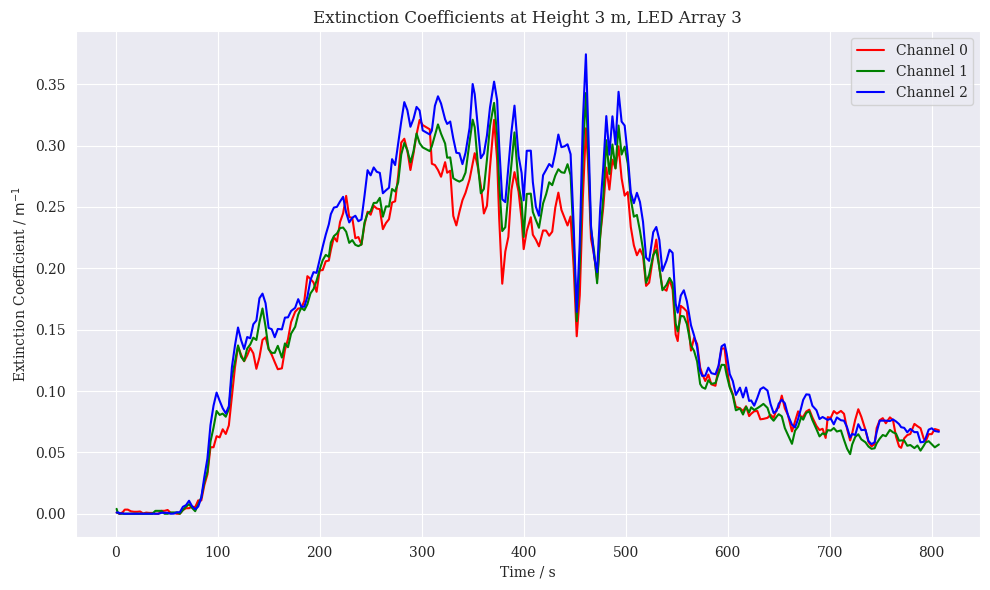

In [16]:
# Parameters
led_array_id = 3  # LED array to analyze
window = 3  # Size of moving average window
color_channels = [0, 1, 2] # RGB channels
height = 3

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot extinction coefficients for each channel
for channel in color_channels:
    # Get extinction coefficients at specified height
    extco = sim.get_extco_at_height(channel=channel, height=height, window=window)

    # Plot with different colors for each channel
    colors = ['red', 'green', 'blue']
    ax.plot(extco.index, extco.iloc[:, led_array_id],
            color=colors[channel],
            label=f'Channel {channel}')

ax.set_xlabel('Time / s')
ax.set_ylabel('Extinction Coefficient / $\mathrm{m^{-1}}$')
ax.set_title(f'Extinction Coefficients at Height {height} m, LED Array {led_array_id}')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

## Plot extinction coefficients as a function of height and LED array for a specific point in time

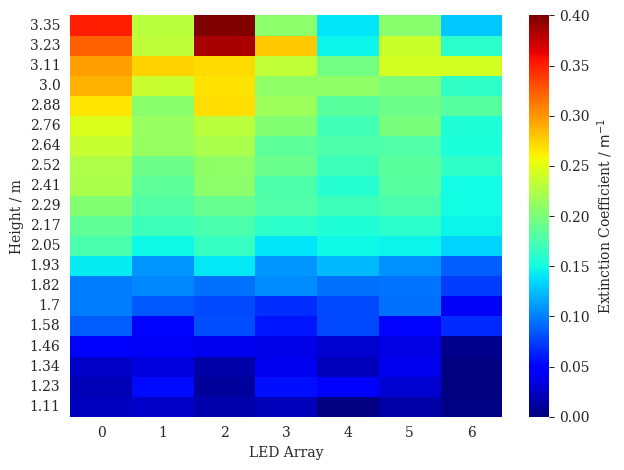

In [17]:
# Parameters
time = 200  # Time point to analyze in seconds
channel = 0  # RGB channels
window = 20  # Size of moving average window

extco = sim.get_extco_at_time(channel=channel, time=time, window=window, yaxis='height')
sns.heatmap(extco, cmap='jet', vmax=0.4, cbar_kws={'label': 'Extinction Coefficient / $\mathrm{m^{-1}}$'})
plt.tight_layout()

## Plot extinction coefficients as a function of height for a specific LED array and point in time


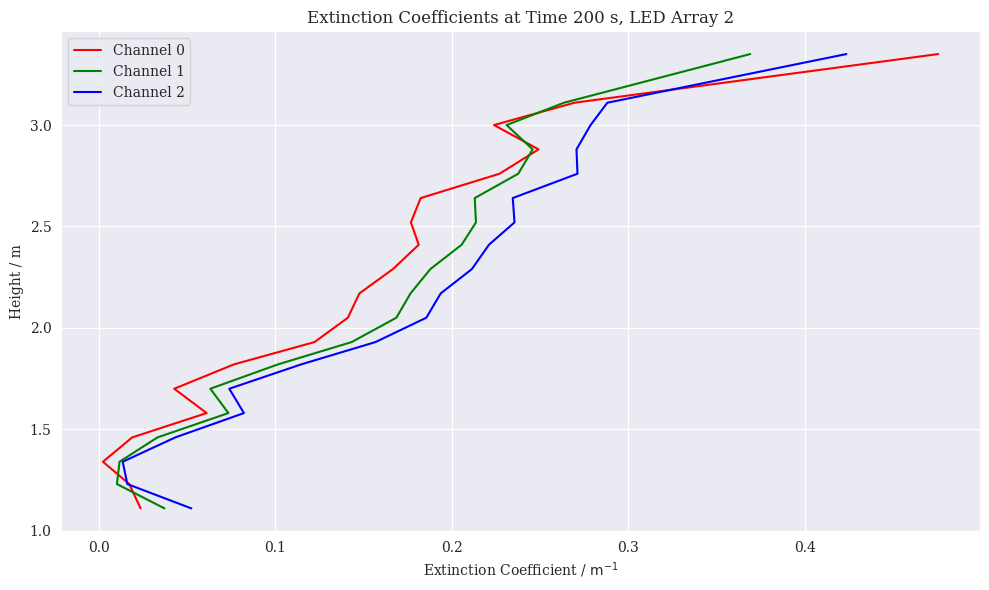

In [20]:
# Parameters
time = 200  # Time point to analyze in seconds
window = 3  # Size of moving average window
led_array_id = 2  # LED array to analyze
color_channels = [0, 1, 2]  # RGB channels

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot extinction coefficients for each channel
for channel in color_channels:
    # Get extinction coefficients at specified time
    extco = sim.get_extco_at_time(channel=channel, time=time, window=window, yaxis='height')

    # Plot with different colors for each channel
    colors = ['red', 'green', 'blue']
    ax.plot(extco.iloc[:, led_array_id], extco.index,
            color=colors[channel],
            label=f'Channel {channel}')

ax.set_xlabel('Extinction Coefficient / $\mathrm{m^{-1}}$')
ax.set_ylabel('Height / m')
ax.set_title(f'Extinction Coefficients at Time {time} s, LED Array {led_array_id}')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()
